## 1.0 Creating a Bar Chart Using Seaborn

In [ ]:
# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Allows plots to be rendered directly inside the notebook
%matplotlib inline 

In [ ]:
# Load the dataset
df = pd.read_csv('pokemon.csv')
print(df.shape)
df.head()

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [ ]:
# check the naming convention of the column names
df.columns

Index(['id', 'species', 'generation_id', 'height', 'weight', 'base_experience',
       'type_1', 'type_2', 'hp', 'attack', 'defense', 'speed',
       'special-attack', 'special-defense'],
      dtype='object')

**Observation**
>There's inconsistency in the columns naming convention. The hyphens on special attack and special defense will be replaced with underscores.

In [ ]:
# Rename the two columns above
df.rename(columns = {'special-attack': 'special_attack',
                     'special-defense': 'special_defense'}, inplace=True)
# Confirm if the changes have been effected by previewing the column names
df.columns

Index(['id', 'species', 'generation_id', 'height', 'weight', 'base_experience',
       'type_1', 'type_2', 'hp', 'attack', 'defense', 'speed',
       'special_attack', 'special_defense'],
      dtype='object')

Before plotting any graphs, it's advised to check if the data types are in the correct format first. If they aren't then change them to the correct format. Use the pandas info() or the dtypes method. 

In [ ]:
# Check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               807 non-null    int64  
 1   species          807 non-null    object 
 2   generation_id    807 non-null    int64  
 3   height           807 non-null    float64
 4   weight           807 non-null    float64
 5   base_experience  807 non-null    int64  
 6   type_1           807 non-null    object 
 7   type_2           405 non-null    object 
 8   hp               807 non-null    int64  
 9   attack           807 non-null    int64  
 10  defense          807 non-null    int64  
 11  speed            807 non-null    int64  
 12  special_attack   807 non-null    int64  
 13  special_defense  807 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 88.4+ KB


**Observation**
>From the above output, the datatypes are in the correct format. We can therefore proceed with the plotting of the graphs.

### Plotting a Bar Chart for the Generation Id Using Seaborn

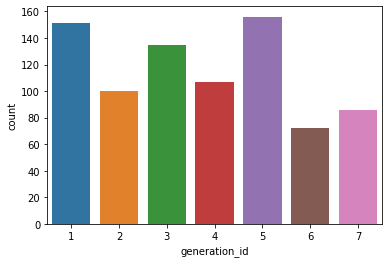

In [ ]:
# Use countplot to create a bar chart for the generation id
sb.countplot(data=df, x='generation_id');

**Observation**
>From the above graph, the colors don't have any meaning. The generation are already associated woth different numbers on the x-axis and we do not have a reason to differentiate them with different colors. Therefore, we'll change it to one color using seaborn color palette function.

In [ ]:
# Use seaborn color palette to ontain one color value
sb.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

**I'll pick the first color and store it in base_color variable.**

In [ ]:
base_color = sb.color_palette()[0]
base_color

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

**Next, I'll add the variable in the countplot function in order to have one color.**

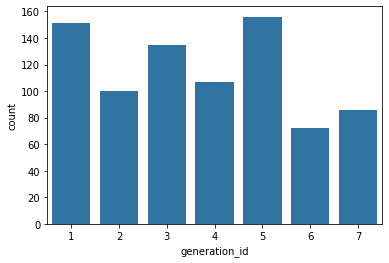

In [ ]:
# Use countplot to create a bar chart for the generation id
# Use base color variable to change the color into one
sb.countplot(data=df, x='generation_id',color=base_color);

To improve on the above plot, we'll consider ordering the generation id's from highest to lowest. Using the matplotlib value_counts() will come in handy. This is because the value_counts() returns the unique values in a column in descending order then we'll use index to map the order of the generation id on the graph.

In [ ]:
# Use value count to get the descinding order of generation id
order_generation = df['generation_id'].value_counts()
order_generation

5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

In [ ]:
# Get the index of the generation ids in descing order
order_gen_idx = df['generation_id'].value_counts().index
order_gen_idx

Int64Index([5, 1, 3, 4, 2, 7, 6], dtype='int64')

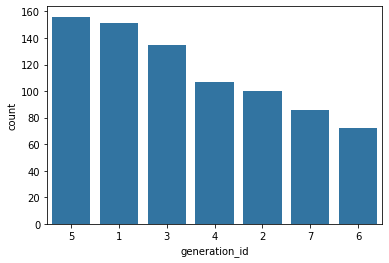

In [ ]:
# Use the index above to sort the bars from highest to lowest
sb.countplot(data=df, x='generation_id',color=base_color, order = order_gen_idx);

In [ ]:
# Get the index for the type_1 values in desceinding order
type_ = df['type_1'].value_counts().index
type_

Index(['water', 'normal', 'grass', 'bug', 'fire', 'psychic', 'rock',
       'electric', 'poison', 'ground', 'dark', 'fighting', 'ghost', 'dragon',
       'steel', 'ice', 'fairy', 'flying'],
      dtype='object')

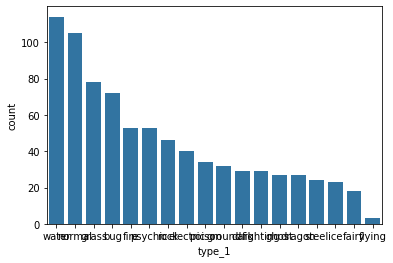

In [ ]:
# Plot a bar chart for type_1
sb.countplot(data=df, x='type_1',color=base_color, order = type_);

From the above plot, the lables have overlapped. This shouldn't be the case for a good visualization. To rectify this, we'll use the matplotlib xtics to rotate the values on the x-axis to 90 degrees by setting rotation = 90 degrees.

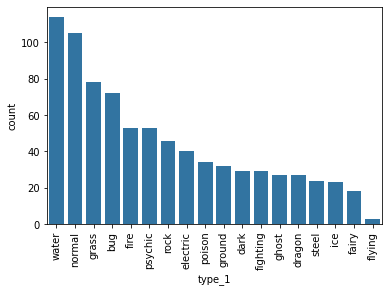

In [ ]:
# Plot a bar chart for type_1
sb.countplot(data=df, x='type_1',color=base_color, order = type_)
plt.xticks(rotation=90);

The other alternative is to set the barchart into a horizontal chart by changing the x parameter to y parameter as shown below:

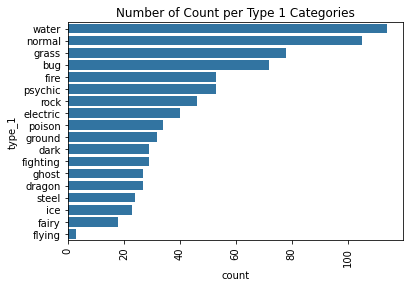

In [ ]:
# Plot a bar chart for type_1
sb.countplot(data=df, y='type_1',color=base_color, order = type_).set(
    title = 'Number of Count per Type 1 Categories')
plt.xticks(rotation=90);

## 2. Creating bar Chart Using Matplotlib

The other way one can even create a similar bar chart is using the Matplotlib, instead of Seaborn. We will use the matplotlib.pyplot.bar() function to plot the chart. The syntax is:
```
matplotlib.pyplot.bar(x, y, width=0.8, bottom=None, *, align='center', data=None).``` In the example below, we will use Series.value_counts() to extract a Series from the given DataFrame object.

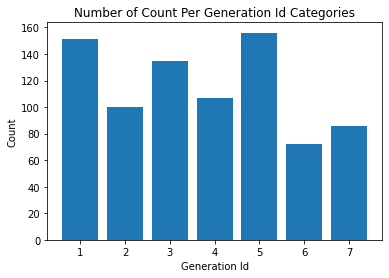

In [ ]:
# Return the Series having unique values
x = df['generation_id'].unique()

# Return the Series having frequency count of each unique value
y = df['generation_id'].value_counts(sort=False)

# Use the matplotlib bar() to plot the bar chart
plt.bar(x, y)

# Labeling the axes
plt.xlabel('Generation Id')
plt.ylabel('Count')

# Title
plt.title('Number of Count Per Generation Id Categories')

# Dsiplay the plot
plt.show()

To have the bar chart display the values from highest to lowest, set the sort parameter to true as shown below:

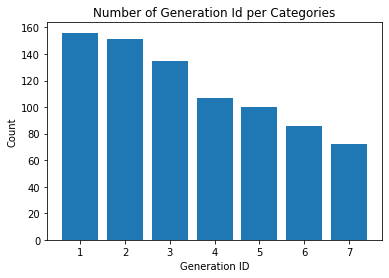

In [ ]:
# Return the Series having unique values
x = df['generation_id'].unique()

# Return the Series having frequency count of each unique value
y = df['generation_id'].value_counts(sort=True)

# Use the matplotlib bar() to plot the bar chart
plt.bar(x, y)

# Labeling the axes
plt.xlabel('Generation ID')
plt.ylabel('Count')

# Graph Title
plt.title('Number of Generation Id per Categories')

# Dsiplay the plot
plt.show()

**Note**
>While we could sort the levels by frequency like above, we usually care about whether the most frequent values are at high levels, low levels, etc. For ordinal-type data, we probably want to sort the bars in order of the variables. The best thing for us to do in this case is to convert the column into an ordered categorical data type.

**Additional Variation**
>Refer to the CategoricalDtype to convert the column into an ordered categorical data type. By default, pandas reads in string data as object types, and will plot the bars in the order in which the unique values were seen. By converting the data into an ordered type, the order of categories becomes innate to the feature, and we won't need to specify an "order" parameter each time it's required in a plot.

## 3.0 Plotting Absolute Vs. Relative Frequency Values in a Bar Chart.
> a. In the previous concept, all bar charts were encoded with absolute frequency, which is the total number of data points for each category. While this can be helpful, there are times when you want to look at the frequency of a category as it relates to the total number of data points, this is relative frequency.

> b. Changing the count axis to reflect relative proportions makes it easier to see how much each category contributes to the whole.

By default, seaborn's countplot function will summarize and plot the data in terms of absolute frequency, or pure counts. In certain cases, you might want to understand the distribution of data or want to compare levels in terms of the proportions of the whole. In this case, you will want to plot the data in terms of relative frequency, where the height indicates the proportion of data taking each level, rather than the absolute count.

One method of plotting the data in terms of relative frequency on a bar chart is to just relabel the count's axis in terms of proportions. The underlying data will be the same, it will simply be the scale of the axis ticks that will be changed.

### 3.1 Example 1. Demonstrate data wrangling, and plot a horizontal bar chart.

Last time we created the bar chart of pokemon by their type_1. Let's club the rows of both type_1 and type_2, so that the resulting dataframe has new column, type_level.

This operation will double the number of rows in pokemon from 807 to 1614

#### 3.1.1 Data Wrangling Step
We will use the ```pandas.DataFrame.melt()``` method to unpivot a DataFrame from wide to long format, optionally leaving identifiers set. The syntax is:
```DataFrame.melt(id_vars, value_vars, var_name, value_name, col_level, ignore_index)```

**Note:**
>It is essential to understand the parameters involved:

>* ```id_vars``` - It is a tuple representing the column(s) to use as identifier variables.
>* ```value_vars``` - It is tuple representing the column(s) to unpivot (remove, out of place).
>* ```var_name``` - It is a name of the new column.
>* ```value_name``` - It is a name to use for the ‘value’ of the columns that are unpivoted. 
Read [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html) for more details on the parameters.

The function below will do the following in the pokemon dataframe out of place:
>* Select the 'id', and 'species' columns from pokemon.
>* Remove the 'type_1', 'type_2' columns from pokemon
>* Add a new column 'type_level' that can have a value either 'type_1' or 'type_2'
>* Add another column 'type' that will contain the actual value contained in the 'type_1', 'type_2' columns. For example, the first row in the pokemon dataframe having ```id=1``` and ```species=bulbasaur``` will now occur twice in the resulting dataframe after the ```melt()``` operation. The first occurrence will have ```type=grass```, whereas, the second occurrence will have ```type=poison```.

#### 3.1.2 Example 1 - Step 2. Data wrangling to reshape the pokemon dataframe

In [ ]:
pkmn_types = df.melt(id_vars=['id', 'species'],
                     value_vars=['type_1', 'type_2'],
                     var_name='type_level',
                     value_name='type')
pkmn_types.head(10)
#pkmn_types.shape

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


#### 3.1.3 Example 1 - Step 3. Find the frequency of unique values in the ```type``` column.

In [ ]:
# Count the frequency of unique values in the `type` column of pkmn_types dataframe. 
# By default, returns the decreasing order of the frequency.
type_counts = pkmn_types['type'].value_counts()
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [ ]:
# Get the unique values of the `type` column, in the decreasing order of the frequency.
type_order = type_counts.index
type_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')

#### 3.1.4 Example 1 - Step 4. Plot the horizontal bar charts

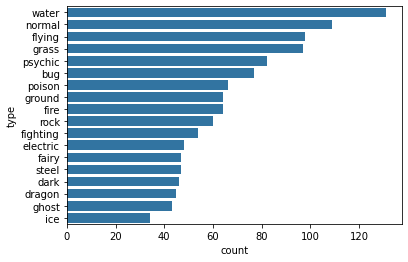

In [ ]:
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

### 3.2 Plot Using the Proportions
> Example 2. Plot a bar chart having the proportions, instead of the actual count, on one of the axes.

### 3.2.1 Example 2 - Step 1. Find the Correction 1: the variable 'identifier' shown in the video is actually the 'species' column in the dataset.

In [ ]:
# Returns the sum of all not-null values in `type` column
n_pokemon = pkmn_types['type'].value_counts().sum()

# Return the highest frequency in the `type` column
max_type_count = type_counts[0]

# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_type_count / n_pokemon
print(max_prop)

0.10808580858085809


#### 3.2.2 Example 2 - Step 2. Create an array of evenly spaced proportioned values

In [ ]:
# Use numpy.arange() function to produce a set of evenly spaced proportioned values 
# between 0 and max_prop, with a step size 2\%
tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

We need x-tick labels that must be evenly spaced on the x-axis. For this purpose, we must have a list of labels ready with us, before using it with ```plt.xticks()``` function.

#### 3.2.3 Example 2 - Step 3. Create a list of String values that can be used as tick labels.

In [ ]:
# Use a list comprehension to create tick_names that we will apply to the tick labels. 
# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
# `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` is used to represent floating point number.
# Refer [here](https://docs.python.org/2/library/string.html#format-string-syntax) for more details
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

**Note**
The ```xticks``` and ```yticks``` functions aren't only about rotating the tick labels. You can also get and set their locations and labels as well. The first argument takes the tick locations: in this case, the tick proportions multiplied back to be on the scale of counts. The second argument takes the tick names: in this case, the tick proportions formatted as strings to two decimal places.

I've also added a ```ylabel``` call to make it clear that we're no longer working with straight counts.

#### 3.2.4 Example 2 - Step 4. Plot the bar chart, with new x-tick labels

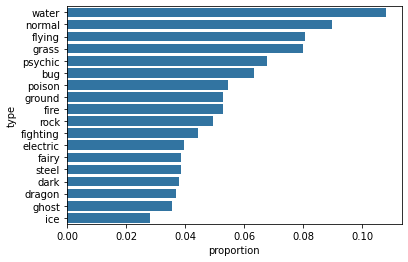

In [ ]:
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);
# Change the tick locations and labels
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');

#### 3.3 Additional Variation
Rather than plotting the data on a relative frequency scale, you might use text annotations to label the frequencies on bars instead. This requires writing a loop over the tick locations and labels and adding one text element for each bar.

#### 3.3.1 Example 3. Print the text (proportion) on the bars of a horizontal plot.

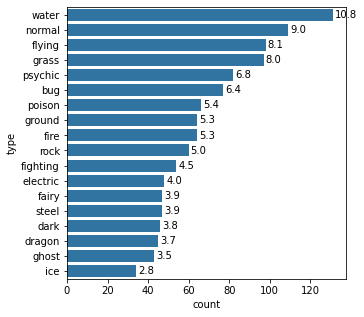

In [ ]:
# Considering the same chart from the Example 1 above, print the text (proportion) on the bars
base_color = sb.color_palette()[0]
plt.figure(figsize = (5,5))
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

# Logic to print the proportion text on the bars
for i in range (type_counts.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = type_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_pokemon)
    # Print the string value on the bar. 
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1, i, pct_string, va='center')

#### 3.3.2 Example 4. Print the text (proportion) below the bars of a Vertical plot.

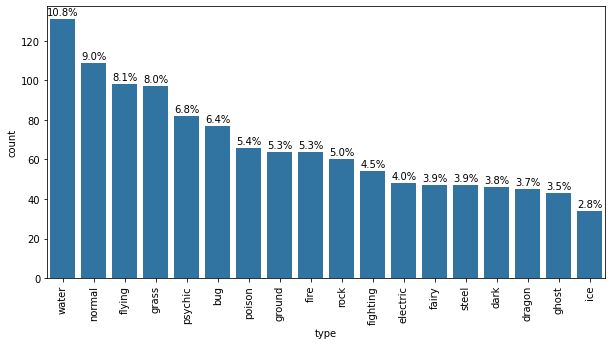

In [ ]:
# Considering the same chart from the Example 1 above, print the text (proportion) BELOW the bars
base_color = sb.color_palette()[0]
plt.figure(figsize = (10,5))
sb.countplot(data=pkmn_types, x='type', color=base_color, order=type_order);


# Recalculating the type_counts just to have clarity.
type_counts = pkmn_types['type'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

  # get the text property for the label to get the correct count
  count = type_counts[label.get_text()]
  pct_string = '{:0.1f}%'.format(100*count/n_pokemon)

  # print the annotation just below the top of the bar
  plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

I used the ```.get_text()``` method to obtain the category name, so I can get the count of each category level. At the end, I use the ```text``` function to print each percentage, with the x-position, y-position, and string as the three main parameters to the function.

**Tip**
> Is the text on the bars not readable clearly? Consider changing the size of the plot by using the following:

In [ ]:
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 12,4

### Plotting a Pie Chart

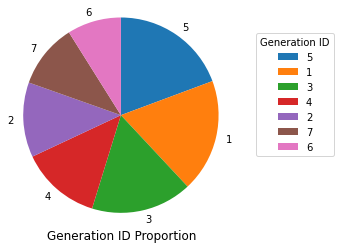

In [ ]:
# Use the same pokemon dataset
sorted_counts = df['generation_id'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);

# We have the used option `Square`. 
# Though, you can use either one specified here - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axis.html?highlight=pyplot%20axis#matplotlib-pyplot-axis
plt.axis('square');
plt.title('Generation ID Proportion',y=-0.1) # , pad=-32
plt.legend(bbox_to_anchor=(1.5,0.9),loc="upper right",title ='Generation ID');

In [ ]:
height = 100
bounce = 1
while bounce <= 3:
  height=height * (3/5)
  bounce += 1


In [ ]:

newheight=height
newheight

21.599999999999998

In [ ]:
# plt.axis('square') # Makes the pie chart fit properly i.e doesn't tilt
# plt.pie(dfc['proportion'], startangle = 90, counterclock = False, autopct='%1.1f%%') # labels = dfc['proportion'].index
# plt.legend(bbox_to_anchor=(1.7,0.8),loc="upper right",title ='Dog Prediction', labels = dfc['proportion'].index)
# plt.title('Top Five Dog Prediction'); # Use theis to put the title at the bottom ,y=-0.1

Putting ```labels = dfc['proportion'].index``` inside the pie() sets the labels aound the pie chart. While putting it at the ```legend ()``` set the labels on the legend.

### Donut Plot
>A sister plot to the pie chart is the donut plot. It's just like a pie chart, except that there's a hole in the center of the plot. Perceptually, there's not much difference between a donut plot and a pie chart, and donut plots should be used with the same guidelines as a pie chart. Aesthetics might be one of the reasons why you would choose one or the other. For instance, you might see statistics reported in the hole of a donut plot to better make use of available space.

> To create a donut plot, you can add a wedgeprops argument to the pie function call. By default, the radius of the pie (circle) is 1; setting the wedges' width property to less than 1 removes coloring from the center of the circle.

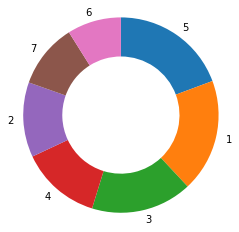

In [ ]:
sorted_counts = df['generation_id'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square');

### 4.0 Plotting a Histogram

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head()

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <a list of 10 Patch objects>)

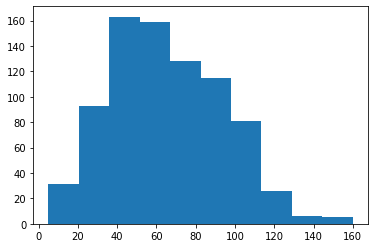

In [ ]:
# We have intentionally not put a semicolon at the end of the statement below to see the bar-width
plt.hist(data = pokemon, x = 'speed')

You can see a non-uniform distribution of data points in different bins.

Overall, a generally bimodal distribution is observed (one with two peaks or humps). The direct adjacency of the bars in the histogram, in contrast to the separated bars in a bar chart, emphasizes the fact that the data takes on a continuous range of values. When a data value is on a bin edge, it is counted in the bin to its right. The exception is the rightmost bin edge, which places data values equal to the uppermost limit into the right-most bin (to the upper limit's left).

By default, the ``hist`` function divides the data into 10 bins, based on the range of values taken. In almost every case, we will want to change these settings. Usually, having only ten bins is too few to really understand the distribution of the data. And the default tick marks are often not on nice, 'round' values that make the ranges taken by each bin easy to interpret.

Wouldn't it be better if I said "between 0 and 2.5" instead of "between about 0 and 2.5", and "from 2.5 to 5" instead of "from about 2.5 to 5" above?

You can use descriptive statistics (e.g. via ```dataframe['column'].describe()```) to gauge what minimum and maximum bin limits might be appropriate for the plot. These bin edges can be set using numpy's ```arange``` function:

### Histogram with fixed number of bins

(array([  6.,  25.,  21.,  72.,  66.,  97.,  53., 106.,  64.,  64.,  69.,
         46.,  52.,  29.,  18.,   8.,   5.,   1.,   4.,   1.]),
 array([  5.  ,  12.75,  20.5 ,  28.25,  36.  ,  43.75,  51.5 ,  59.25,
         67.  ,  74.75,  82.5 ,  90.25,  98.  , 105.75, 113.5 , 121.25,
        129.  , 136.75, 144.5 , 152.25, 160.  ]),
 <a list of 20 Patch objects>)

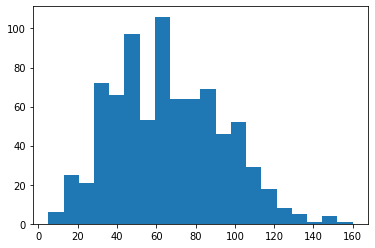

In [ ]:
# Plot histogram with fixed number of bins
plt.hist(data = pokemon, x = 'speed', bins = 20)

### Histogram with dynamic number of bins

The first argument to ```arange``` is the leftmost bin edge, the second argument the upper limit, and the third argument the bin width. Note that even though I've specified the "max" value in the second argument, I've added a "+5" (the bin width). That is because ```arange``` will only return values that are strictly less than the upper limit. Adding in "+5" is a safety measure to ensure that the rightmost bin edge is at least the maximum data value, so that all of the data points are plotted. The leftmost bin is set as a hardcoded value to get a nice, interpretable value, though you could use functions like numpy's ```around``` if you wanted to approach that end programmatically.

(array([ 0.,  3.,  4., 11., 19., 18., 43., 38., 57., 46., 53., 48., 62.,
        55., 53., 27., 45., 32., 39., 42., 36., 22., 18., 12.,  8.,  5.,
         5.,  0.,  1.,  1.,  3.,  1.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160]),
 <a list of 32 Patch objects>)

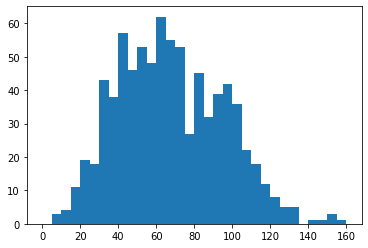

In [ ]:
# Create bins with step-size 5
# A histogram with a dynamic number of bins, each with a step-size 5.
bins = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data = pokemon, x = 'speed', bins = bins)

### Alternative Approach - Seaborn's ```distplot()```
This function can also plot histograms, as similar to the ```pyploy.hist()``` function, and is integrated with other univariate plotting functions. This is in contrast to our ability to specify a data source and column as separate arguments, like we've seen with and ```countplot``` and ```hist```.

The basic syntax is:

```seaborn.distplot(Series, bins, kde, hist_kws)```

Let's see the sample usage of the arguments mentioned above. However, there are many other arguments that you can explore in the [syntax definition](https://seaborn.pydata.org/generated/seaborn.distplot.html)

>**Note**:
From the Seaborn v0.11.0 onwards, this function is deprecated and will be removed in a future version. You can use either of the following two functions: displot() or histplot() to plot histograms using Seaborn

#### Plot the similar histogram with Seaborn's ```distplot()```

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


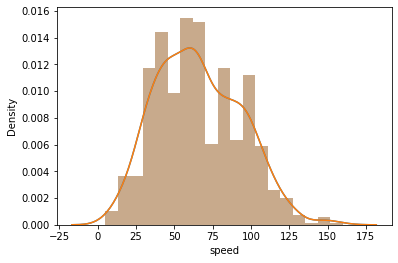

In [ ]:
sb.distplot(pokemon['speed'])

# Set the argument `kde=False` to remove the estimate-line representing the Gaussian kernel density estimate.
sb.distplot(pokemon['speed']); #, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


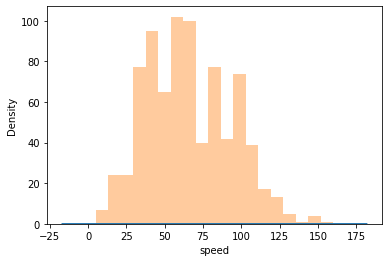

In [ ]:
sb.distplot(pokemon['speed'])

# Set the argument `kde=False` to remove the estimate-line representing the Gaussian kernel density estimate.
sb.distplot(pokemon['speed'], kde=False)

The distplot function has built-in rules for specifying histogram bins, and by default plots a curve depicting the kernel density estimate (KDE) on top of the data. The vertical axis is based on the KDE, rather than the histogram: you shouldn't expect the total heights of the bars to equal 1, but the area under the curve should equal 1. If you want to learn more about KDEs, check out the extra page at the end of the lesson.

Despite the fact that the default bin-selection formula used by distplot might be better than the choice of ten bins that .hist uses, you'll still want to do some tweaking to align the bins to 'round' values. You can use other parameter settings to plot just the histogram and specify the bins like before:

In [ ]:
# df = pokemon.copy(deep=True)
# bin_edges = np.arange(0, df['num_var'].max()+1, 1)
# sb.distplot(df['num_var'], bins = bin_edges, kde = False,
#             hist_kws = {'alpha' : 1})

The alpha (transparency) setting must be associated as a dictionary to "hist_kws" since there are other underlying plotting functions, like the KDE, that have their own optional keyword parameters.

### Plot two histograms side-by-side
When creating histograms, it's useful to play around with different bin widths to see what represents the data best. Too many bins, and you may see too much noise that interferes with the identification of the underlying signal. Too few bins, and you may not be able to see the true signal in the first place.

Let's see a new example demonstrating a few new functions, ```pyplot.subplot()``` and ```pyplot.figure()```.

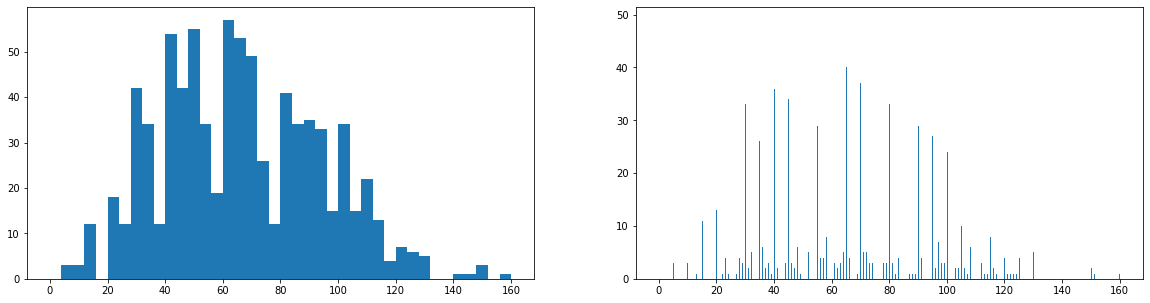

In [ ]:
# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

This example puts two plots side by side through use of the subplot function, whose arguments specify the number of rows, columns, and index of the active subplot (in that order). The figure() function is called with the "figsize" parameter so that we can have a larger figure to support having multiple subplots. (More details on figures and subplots are coming up next in the lesson.)

### Summary of Histograms
In summary, if your exploration is only interested in the histogram-depiction of the data, and not the additional functionality offered by distplot, then you might be better off with just using Matplotlib's hist function for simplicity. On the other hand, if you want a quick start on choosing a representative bin size for histogram plotting, you might take a quick look at the basic distplot first before getting into the customization.

### Demonstrate figure.add_axes() and axes.hist() using Matplotlib

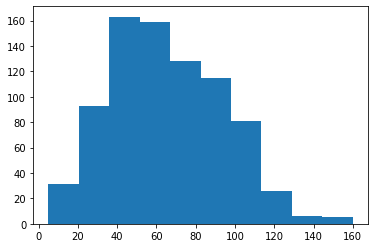

In [ ]:
# Create a new figure
fig = plt.figure()

# The argument of add_axes represents the dimensions [left, bottom, width, height] of the new axes. 
# All quantities are in fractions of figure width and height.
ax = fig.add_axes([.125, .125, .775, .755])
ax.hist(data=pokemon, x='speed');

### Use axes with seaborn.countplot() 

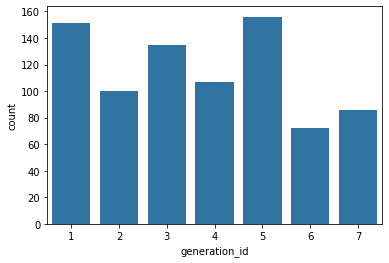

In [ ]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, ax = ax);

### Create Subplots Using Matplotlib

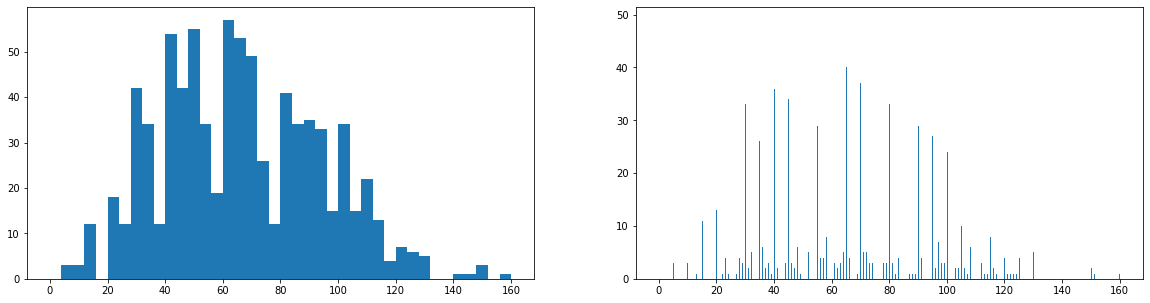

In [ ]:
# Resize the chart, and have two plots side-by-side
# set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

### Additional Techniques
To close this page, we'll quickly run through a few other ways of dealing with Axes and subplots. The techniques above should suffice for basic plot creation, but you might want to keep the following in the back of your mind as additional tools to break out as needed.

If you don't assign Axes objects as they're created, you can retrieve the current Axes using ```ax = plt.gca()```, or you can get a list of all Axes in a Figure fig by using ```axes = fig.get_axes()```. As for creating subplots, you can use ```fig.add_subplot()``` in the same way as plt.subplot() above. If you already know that you're going to be creating a bunch of subplots, you can use the ```plt.subplots()``` function:

As a special note for the text, the Axes limits are [0,1] on each Axes by default, and we increment the iterator counter i by 1 to get the subplot index, if we were creating the subplots through ```subplot()```. (Reference: ```plt.sca()```, ```plt.text()```)

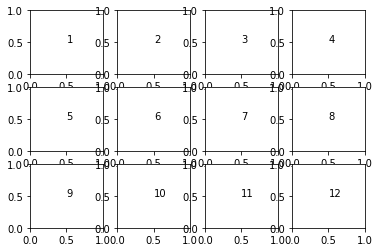

In [ ]:

fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
#fig = plt.figure(figsize = [8,5])
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes

### Descriptive Statistics, Outliers, and Axis Limits

As you create your plots and perform your exploration, make sure that you pay attention to what the plots tell you that go beyond just the basic descriptive statistics. Note any aspects of the data like the number of modes and skew, and note the presence of outliers in the data for further investigation.

Related to the latter point, you might need to change the limits or scale of what is plotted to take a closer look at the underlying patterns in the data. Let's see a few examples.

#### Example 1. Plot the histogram from the data having a skewed distribution of values

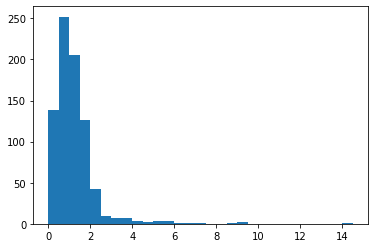

In [ ]:
# Plotting a histogram for the height
# Get the ticks for bins between [0-15], at an interval of 0.5
bins = np.arange(0, pokemon['height'].max()+0.5, 0.5)

# Plot the histogram for the height column
plt.hist(data=pokemon, x='height', bins=bins);

In order to change a histogram's axis limits, you can add a Matplotlib xlim() call to your code. The function takes a tuple of two numbers specifying the upper and lower bounds of the x-axis range. See the example below.

#### Example 2. Plot the histogram with a changed axis limit.

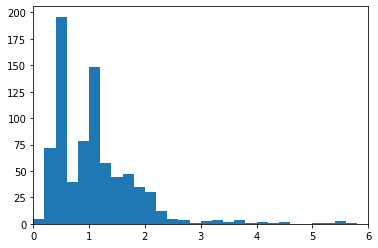

In [ ]:
# Get the ticks for bins between [0-15], at an interval of 0.5
bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data=pokemon, x='height', bins=bins);

# Set the upper and lower bounds of the bins that are displayed in the plot
# Refer here for more information - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlim.html
# The argument represent a tuple of the new x-axis limits.
plt.xlim((0,6));

Note: Alternatively, the ``xlim``` function can be called with two numeric arguments only, ```plt.xlim(0,6)```, to get the same result.

In the generic example above, we might be interested in comparing patterns in other variables between data points that take values less than 6 to those that take values greater than 6. For anything that is concentrated on the bulk of the data in the former group (< 6), the use of axis limits can allow focusing on data points in that range without needing to go through the creation of new DataFrame filtering out the data points in the latter group (> 6).

**TO DO:**
>* Plot the above two graphs in a single figure of size 20 x 5 inches, side-by-side.

**Hint** - Use the steps below:

>* Define the figure size, using ```matplotlib.pyplot.figure(figsize = [float, float])```.
>* Add a subplot using ```matplotlib.pyplot.subplot(int, int, index)``` for the left-graph to the current figure. Then, define the left-graph.
Similarly, add a subplot for the right-graph to the current figure. Then, define the right-graph.

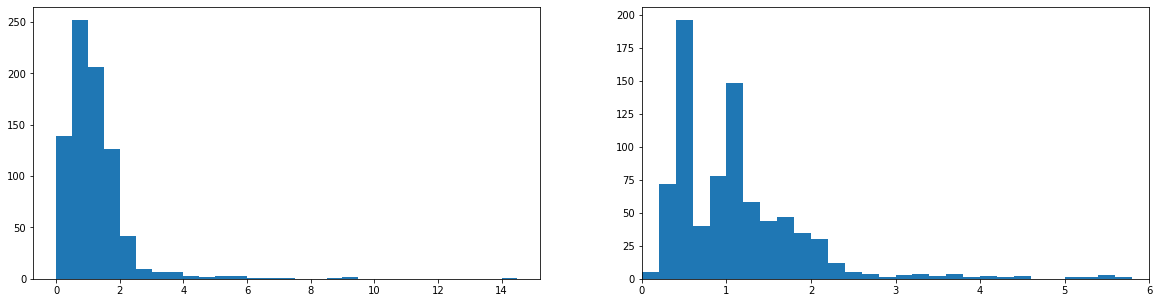

In [ ]:
# Define the figure size
plt.figure(figsize = [20, 5])

# add a subplot
# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, pokemon['height'].max()+0.5, 0.5)
plt.hist(data=pokemon, x='height', bins = bin_edges)

# histogram on right: focus in on bulk of data < 6
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data=pokemon, x='height', bins = bin_edges)
plt.xlim(0, 6); # could also be called as plt.xlim((0, 6))

In [ ]:
# Histogram function
def hist_function(df, column_name):
  # Define the figure size
  plt.figure(figsize = [20, 3])
  bin_edges = np.arange(0, df[column_name].max()+5, 5)
  plt.hist(data=df, x=column_name, bins = bin_edges)
  plt.title(column_name.title() + ' Distribution')
  plt.xlabel(column_name.title())
  plt.ylabel('Count')
  return plt.show()

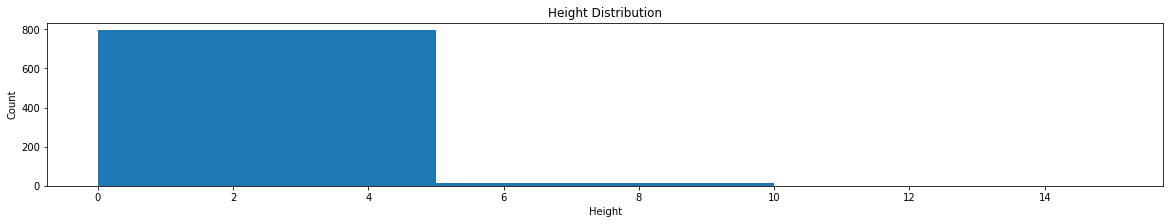

In [ ]:
hist_function(pokemon, 'height')

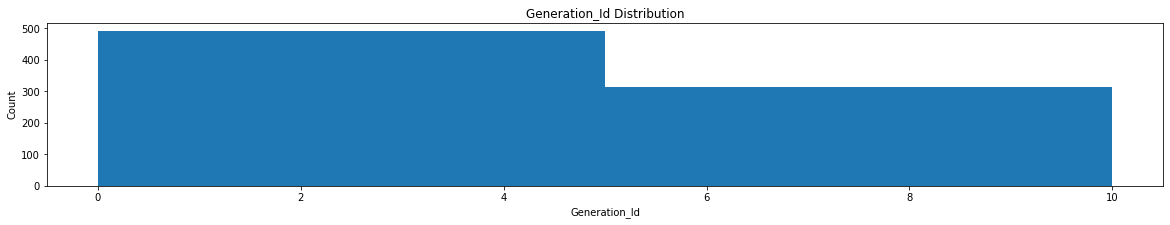

In [ ]:
hist_function(pokemon, 'generation_id')

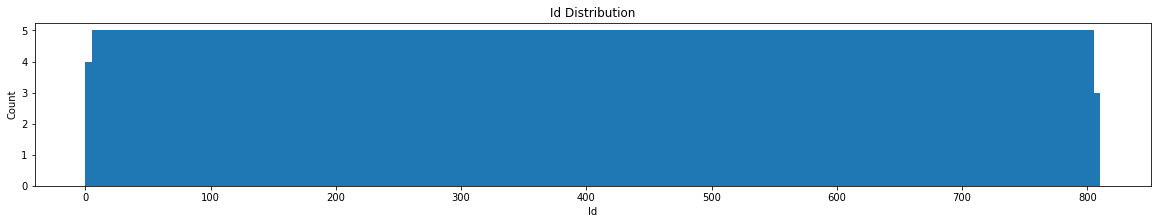

In [ ]:
hist_function(pokemon, 'id')

In [ ]:
pokemon['generation_id'].unique()

array([1, 2, 3, 4, 5, 6, 7])

### How to select Numeric columns only

In [ ]:
numerical_data = pokemon._get_numeric_data()

In [ ]:
pokemon.select_dtypes(exclude = ['object']).head()

,id,generation_id,height,weight,base_experience,hp,attack,defense,speed,special-attack,special-defense
0,1,1,0.7,6.9,64,45,49,49,45,65,65
1,2,1,1.0,13.0,142,60,62,63,60,80,80
2,3,1,2.0,100.0,236,80,82,83,80,100,100
3,4,1,0.6,8.5,62,39,52,43,65,60,50
4,5,1,1.1,19.0,142,58,64,58,80,80,65


In [ ]:
pokemon.select_dtypes(exclude = 'object').head()

,id,generation_id,height,weight,base_experience,hp,attack,defense,speed,special-attack,special-defense
0,1,1,0.7,6.9,64,45,49,49,45,65,65
1,2,1,1.0,13.0,142,60,62,63,60,80,80
2,3,1,2.0,100.0,236,80,82,83,80,100,100
3,4,1,0.6,8.5,62,39,52,43,65,60,50
4,5,1,1.1,19.0,142,58,64,58,80,80,65


In [ ]:
pokemon.select_dtypes(np.number).head()

,id,generation_id,height,weight,base_experience,hp,attack,defense,speed,special-attack,special-defense
0,1,1,0.7,6.9,64,45,49,49,45,65,65
1,2,1,1.0,13.0,142,60,62,63,60,80,80
2,3,1,2.0,100.0,236,80,82,83,80,100,100
3,4,1,0.6,8.5,62,39,52,43,65,60,50
4,5,1,1.1,19.0,142,58,64,58,80,80,65


In [ ]:
pokemon.select_dtypes('number').head()

,id,generation_id,height,weight,base_experience,hp,attack,defense,speed,special-attack,special-defense
0,1,1,0.7,6.9,64,45,49,49,45,65,65
1,2,1,1.0,13.0,142,60,62,63,60,80,80
2,3,1,2.0,100.0,236,80,82,83,80,100,100
3,4,1,0.6,8.5,62,39,52,43,65,60,50
4,5,1,1.1,19.0,142,58,64,58,80,80,65


### Filter categorical columns

In [ ]:
categorical_df = pokemon.select_dtypes(exclude = 'number')
categorical_df.head()

,species,type_1,type_2
0,bulbasaur,grass,poison
1,ivysaur,grass,poison
2,venusaur,grass,poison
3,charmander,fire,NaN
4,charmeleon,fire,NaN


In [ ]:
pokemon.select_dtypes('object').head()

,species,type_1,type_2
0,bulbasaur,grass,poison
1,ivysaur,grass,poison
2,venusaur,grass,poison
3,charmander,fire,NaN
4,charmeleon,fire,NaN


In [ ]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   species  807 non-null    object
 1   type_1   807 non-null    object
 2   type_2   405 non-null    object
dtypes: object(3)
memory usage: 19.0+ KB


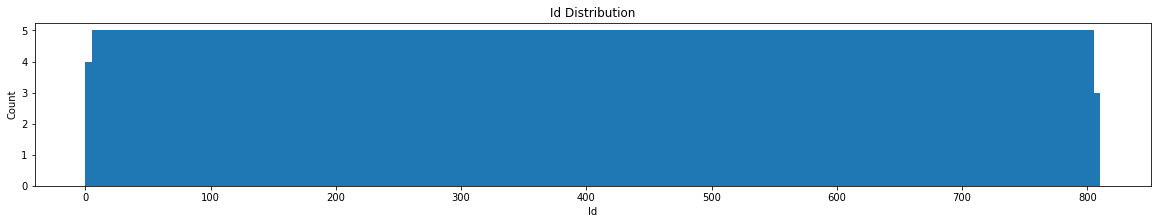

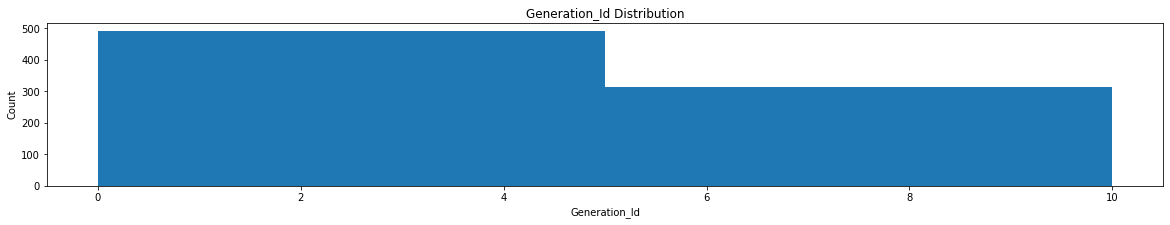

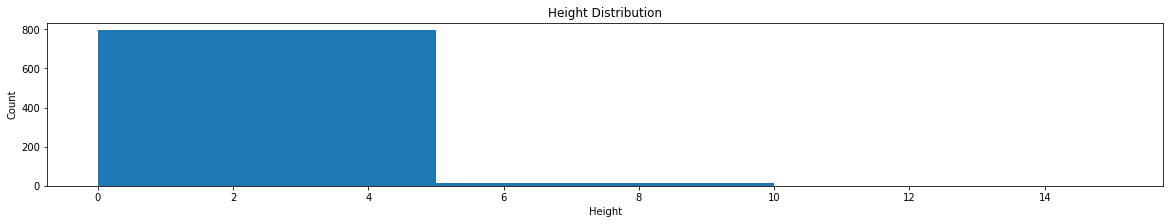

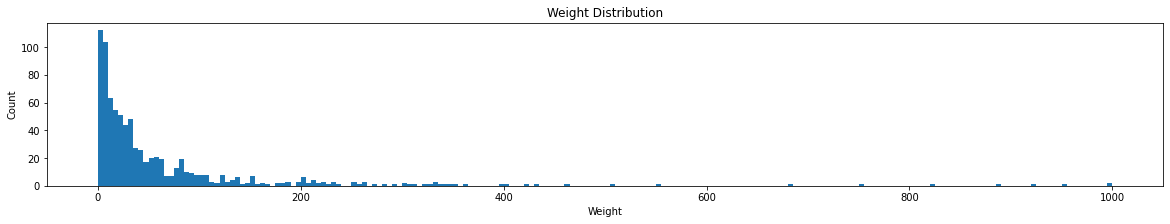

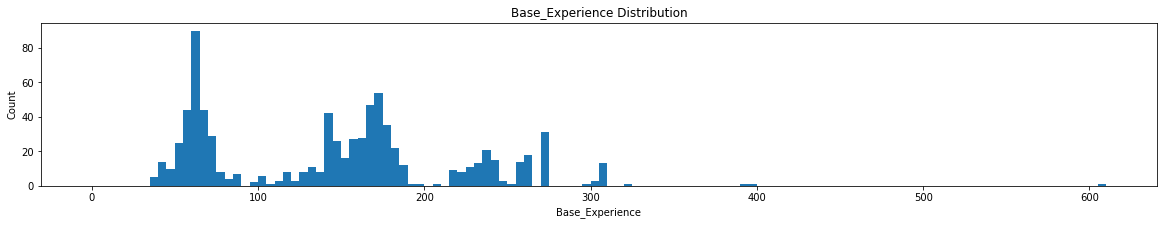

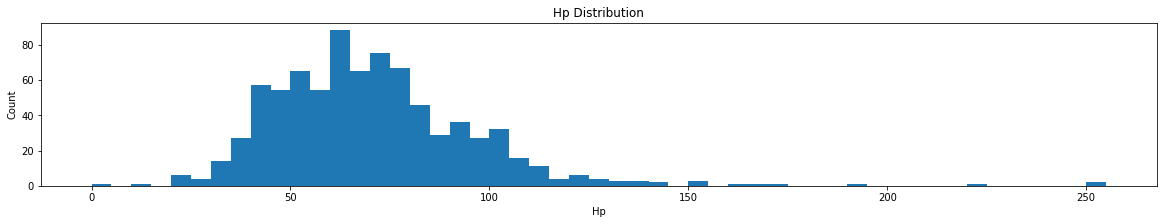

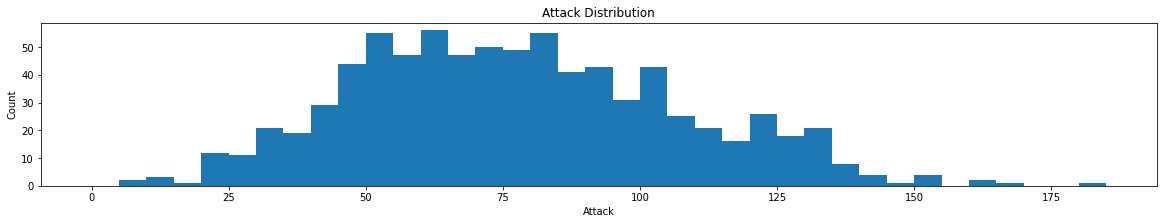

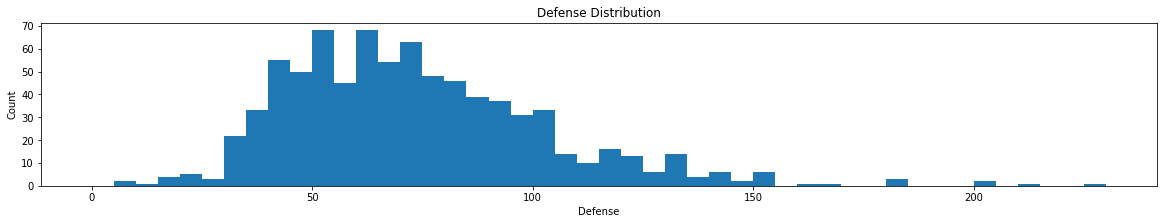

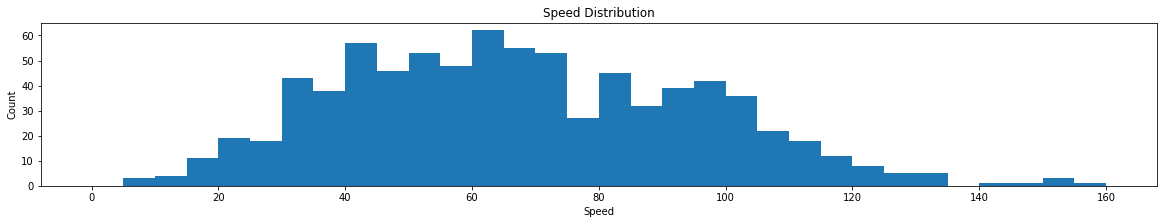

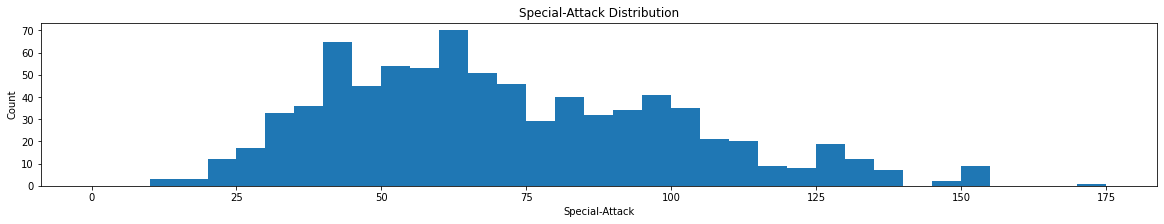

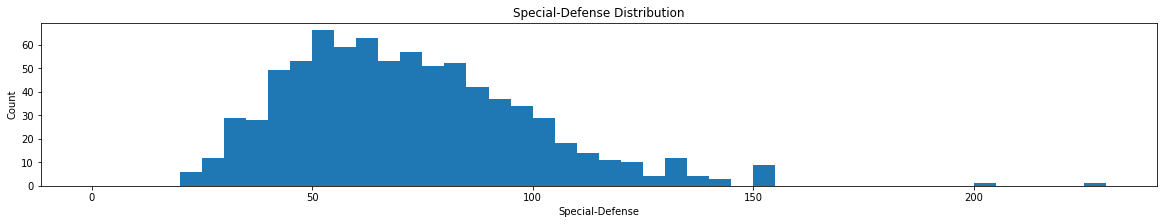

In [ ]:
for i, m in numerical_data.items():
  hist_function(pokemon, i)

### Scales and Transformations 
The above histograms can be improved using scales and transformation as shown below and as documented on this [Link](https://www.youtube.com/watch?v=fo0VIbQRBJk).

Certain data distributions will find themselves amenable to scale transformations. The most common example of this is data that follows an approximately log-normal distribution. This is data that, in their natural units, can look highly skewed: lots of points with low values, with a very long tail of data points with large values. However, after applying a logarithmic transform to the data, the data will follow a normal distribution. (If you need a refresher on the logarithm function, [check this out](https://www.khanacademy.org/math/algebra2/exponential-and-logarithmic-functions).

#### Example 1 - Scale the x-axis to log-type

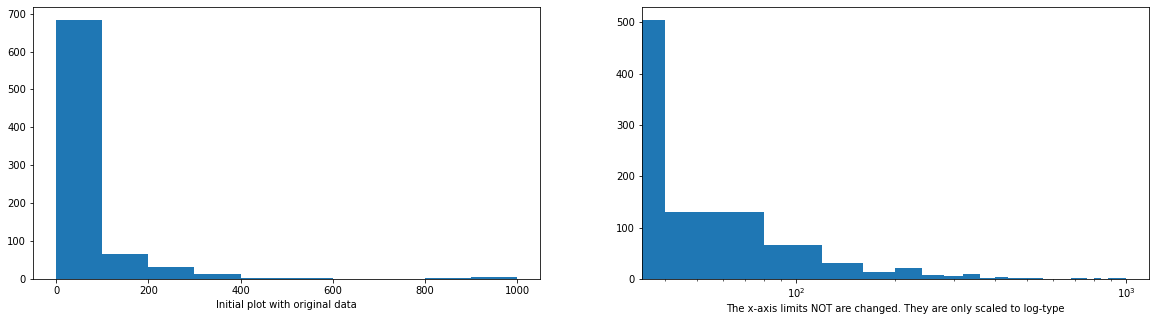

In [ ]:
plt.figure(figsize = [20, 5])

# HISTOGRAM ON LEFT: full data without scaling
plt.subplot(1, 2, 1)
plt.hist(data=pokemon, x='weight');
# Display a label on the x-axis
plt.xlabel('Initial plot with original data')

# HISTOGRAM ON RIGHT 
plt.subplot(1, 2, 2)

# Get the ticks for bins between [0 - maximum weight]
bins = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data=pokemon, x='weight', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
# Refer - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xscale.html
plt.xscale('log')
plt.xlabel('The x-axis limits NOT are changed. They are only scaled to log-type');

In [ ]:
# Describe the data
pokemon['weight'].describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

**Observation**

Notice two things about the right histogram of example 1 above, now.

>* Even though the data is on a log scale, the bins are still linearly spaced. This means that they change size from wide on the left to thin on the right, as the values increase multiplicative. Matplotlib's xscale function includes a few built-in transformations: we have used the 'log' scale here.
Secondly, the default label (x-axis ticks) settings are still somewhat tricky to interpret and are sparse as well.
To address the bin size issue, we just need to change them so that they are evenly-spaced powers of 10. Depending on what you are plotting, a different base power like 2 might be useful instead.

>* To address the second issue of interpretation of x-axis ticks, the scale transformation is the solution. In a scale transformation, the gaps between values are based on the transformed scale, but you can interpret data in the variable's natural units.

Let's see another example below.

### Example 2 - Scale the x-axis to log-type, and change the axis limit.

In [ ]:
# Transform the describe() to a scale of log10
# Documentation: [numpy `log10`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log10.html)
np.log10(pokemon['weight'].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

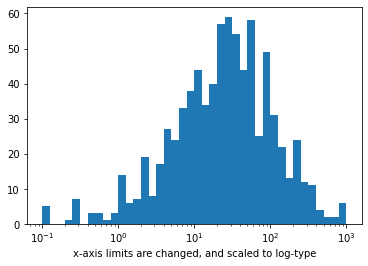

In [ ]:
# Axis transformation
# Bin size
bins = 10 ** np.arange(-1, 3+0.1, 0.1)
plt.hist(data=pokemon, x='weight', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

# Apply x-axis label
# Documentatin: [matplotlib `xlabel`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html))
plt.xlabel('x-axis limits are changed, and scaled to log-type');

### Example 3 - Scale the x-axis to log-type, change the axis limits, and increase the x-ticks

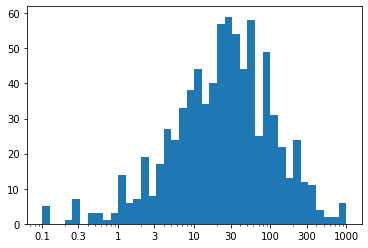

In [ ]:

# Get the ticks for bins between [0 - maximum weight]
bins = 10 ** np.arange(-1, 3+0.1, 0.1)

# Generate the x-ticks you want to apply
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
# Convert ticks into string values, to be display along the x-axis
labels = ['{}'.format(v) for v in ticks]

# Plot the histogram
plt.hist(data=pokemon, x='weight', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

# Apply x-ticks
plt.xticks(ticks, labels);

**Observation**

We've ended up with the same plot as when we performed the direct log transform, but now with a much nicer set of tick marks and labels.

For the ticks, we have used xticks() to specify locations and labels in their natural units. Remember: we aren't changing the values taken by the data, only how they're displayed. Between integer powers of 10, we don't have clean values for even markings, but we can still get close. Setting ticks in cycles of 1-3-10 or 1-2-5-10 are very useful for base-10 log transforms.

It is important that the xticks are specified after xscale since that function has its own built-in tick settings.

### Alternative Approach
Be aware that a logarithmic transformation is not the only one possible. When we perform a logarithmic transformation, our data values have to all be positive; it's impossible to take a log of zero or a negative number. In addition, the transformation implies that additive steps on the log scale will result in multiplicative changes in the natural scale, an important implication when it comes to data modeling. The type of transformation that you choose may be informed by the context for the data. For example, [this wikipedia section](https://en.wikipedia.org/wiki/Log-normal_distribution#Occurrence_and_applications) provides a few examples of places where log-normal distributions have been observed.

If you want to use a different transformation that's not available in ```xscale```, then you'll have to perform some feature engineering. In cases like this, we want to be systematic by writing a function that applies both the transformation and its inverse. The inverse will be useful in cases where we specify values in their transformed units and need to get the natural units back. For the purposes of demonstration, let's say that we want to try plotting the above data on a square-root transformation. (Perhaps the numbers represent areas, and we think it makes sense to model the data on a rough estimation of radius, length, or some other 1-d dimension.) We can create a visualization on this transformed scale like this:

### Example 4. Custom scaling the given data Series, instead of using the built-in log scale

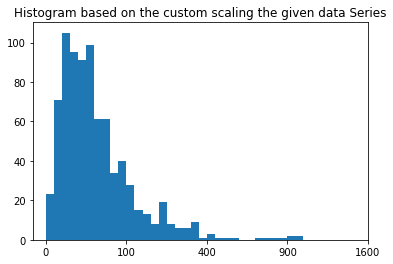

In [ ]:
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

# Bin resizing, to transform the x-axis    
bin_edges = np.arange(0, sqrt_trans(pokemon['weight'].max())+1, 1)

# Plot the scaled data
plt.hist(pokemon['weight'].apply(sqrt_trans), bins = bin_edges)

# Identify the tick-locations
tick_locs = np.arange(0, sqrt_trans(pokemon['weight'].max())+10, 10)
plt.title('Histogram based on the custom scaling the given data Series')

# Apply x-ticks
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int));

Note that ```data``` is a pandas Series, so we can use the ```apply``` method for the function. If it were a NumPy Array, we would need to apply the function like in the other cases. The tick locations could have also been specified with the natural values, where we apply the standard transformation function on the first argument of ```xticks``` instead. The output transformed-histogram is shown below:

### Kernel Density Estimation
Earlier in this lesson, you saw an example of kernel density estimation (KDE) through the use of seaborn's ```distplot``` function, which plots a KDE on top of a histogram.

#### Example 1. Plot the Kernel Density Estimation (KDE)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


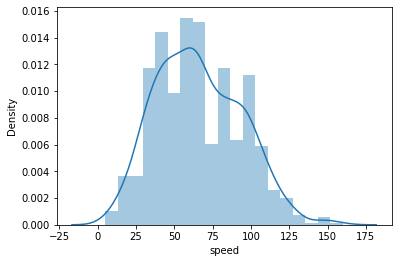

In [ ]:
# The pokemon dataset is available to download at the bottom of this page.
sb.distplot(pokemon['speed']);

**Note**

The ```distplot()``` function is deprecated in Seaborn v 0.11.0, and will be removed in a future version. The alternative is either of the following:

>* ```displot()``` - A figure-level function with similar flexibility.
>* ```histplot()``` - An axes-level function for histograms.

See the same example with newer ```displot()``` function:

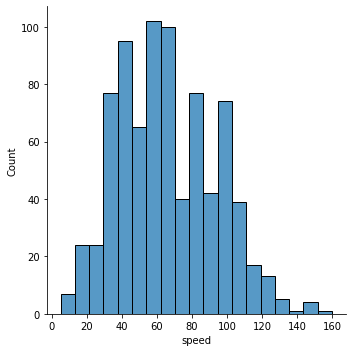

In [ ]:
# Use this new function only with Seaborn 0.11.0 and above. 
# The kind argument can take any one value from {“hist”, “kde”, “ecdf”}.
sb.displot(pokemon['speed'], kind='hist');
# Use the 'kde' kind for kernel density estimation
# sb.displot(pokemon['speed'], kind='kde');

Seaborn's distplot function calls another function, kdeplot, to generate the KDE. The demonstration code below also uses a third function called by distplot for illustration, rugplot(). In a rugplot, data points are depicted as dashes on a number line.

### Example 2. Demonstrating distplot() and rugplot() to plot the KDE

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/dis

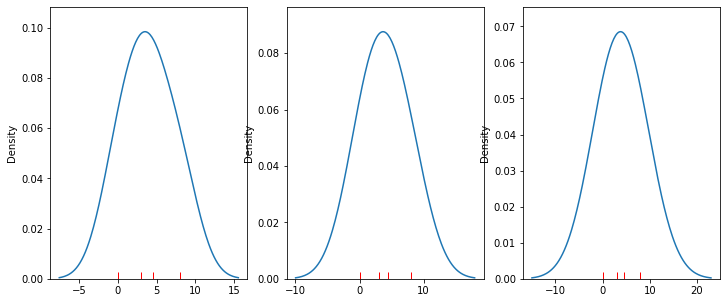

In [ ]:
data = [0.0, 3.0, 4.5, 8.0]
plt.figure(figsize = [12, 5])

# left plot: showing kde lumps with the default settings
plt.subplot(1, 3, 1)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'})

# central plot: kde with narrow bandwidth to show individual probability lumps
plt.subplot(1, 3, 2)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1})

# right plot: choosing a different, triangular kernel function (lump shape)
plt.subplot(1, 3, 3)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1.5, 'kernel' : 'tri'});

Interpreting proportions from this plot type is slightly trickier than a standard histogram: the vertical axis indicates a density of data rather than straightforward proportions. Under a KDE plot, the total area between the 0-line and the curve will be 1. The probability of an outcome falling between two values is found by computing the area under the curve that falls between those values. Making area judgments like this without computer assistance is difficult and likely to be inaccurate.

Despite the fact that making specific probability judgments are not as intuitive with KDE plots as histograms, there are still reasons to use kernel density estimation. If there are relatively few data points available, KDE provides a smooth estimate of the overall distribution of data. These ideas may not be so easily conveyed through histograms, in which the large discreteness of jumps may end up misleading.

It should also be noted that there is a bandwidth parameter in KDE that specifies how wide the density lumps are. Similar to bin width for histograms, we need to choose a bandwidth size that best shows the signal in the data. A too-small bandwidth can make the data look noisier than it really is, and a too-large bandwidth can smooth out useful features that we could use to make inferences about the data. It’s good to keep this in mind in case the default bandwidths chosen by your visualization software don’t look quite right or if you need to perform further investigations.

### Waffle Plots
One alternative univariate plot type that you might see for categorical data is the waffle plot, also known as the square pie chart. While the standard pie chart uses a circle to represent the whole, a waffle plot is plotted onto a square divided into a 10x10 grid. Each small square in the grid represents one percent of the data, and a number of squares are colored by category to indicate total proportions. Compared to a pie chart, it is much easier to make precise assessments of relative frequencies.

There's no built-in function for waffle plots in Matplotlib or Seaborn, so we'll need to take some additional steps in order to build one with the tools available. First, we need to create a function to decide how many blocks to allocate to each category. The function below, percentage_blocks, uses a rule where each category gets a number of blocks equal to the number of full percentage points it covers. The remaining blocks to get to the full one hundred are assigned to the categories with the largest fractional parts.

In [ ]:
def percentage_blocks(df, var):
    """
    Take as input a dataframe and variable, and return a Pandas series with
    approximate percentage values for filling out a waffle plot.
    """
    # compute base quotas
    percentages = 100 * df[var].value_counts() / df.shape[0]
    counts = np.floor(percentages).astype(int) # integer part = minimum quota
    decimal = (percentages - counts).sort_values(ascending = False)

    # add in additional counts to reach 100
    rem = 100 - counts.sum()
    for cat in decimal.index[:rem]:
        counts[cat] += 1

    return counts

In [ ]:
pokemon.head(3)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100


In [ ]:
pokemon['generation_id'].value_counts()


5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

In [ ]:
pokemon['generation_id'].value_counts()/ pokemon.shape[0]


5    0.193309
1    0.187113
3    0.167286
4    0.132590
2    0.123916
7    0.106568
6    0.089219
Name: generation_id, dtype: float64

In [ ]:
percentage_blocks(pokemon, 'generation_id')

5    19
1    19
3    17
4    13
2    12
7    11
6     9
Name: generation_id, dtype: int64

Now it's time to actually plot those counts as boxes in the waffle plot form. To do this, we'll make use of Matplotlib's bar function. We could have used this function earlier in the lesson to create our bar charts instead of Seaborn's countplot, but it would have required us to aggregate the data first to get the height of each bar. For the case of the waffle plot, we're going to specify the x- and y- coordinates of the boxes, and set their widths and heights to be equal, to create squares. The initial plotting code looks like this:

In [ ]:
waffle_counts = percentage_blocks(pokemon, 'type_2')
waffle_counts.shape[0]

18

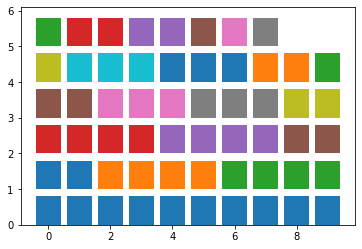

In [ ]:
waffle_counts = percentage_blocks(pokemon, 'type_2')

prev_count = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
  # get the block indices
  blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
  # and put a block at each index's location
  x = blocks % 10 # use mod operation to get ones digit
  y = blocks // 10 # use floor division to get tens digit
  plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
  prev_count += waffle_counts[cat]

The blocks are drawn from left to right, bottom to top, using the ones and tens digits for numbers from 0 to 99 to specify the x- and y- positions, respectively. A loop is used to call the bar function once for each category; each time it is called, the plotted bars are assigned a different color.

The last steps that we need to do involve aesthetic cleaning to polish it up for interpretability. We can take away the plot border and ticks, since they're arbitrary, but we should change the limits so that the boxes are square. We should also add a legend so that the mapping from colors to category levels is clear.

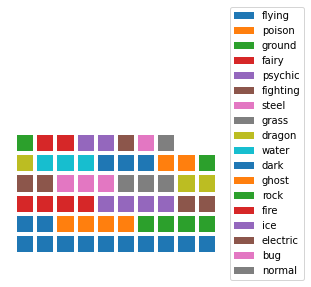

In [ ]:
waffle_counts = percentage_blocks(pokemon, 'type_2')

prev_count = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
    # and put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    prev_count += waffle_counts[cat]

# aesthetic wrangling
plt.legend(waffle_counts.index, bbox_to_anchor = (1, 0.5), loc = 6)
plt.axis('off')
plt.axis('square');

In [1]:
# waffle_counts = percentage_blocks(pokemon, 'generation_id') # Rename the 1-7 into strings

# prev_count = 0
# # for each category,
# for cat in range(waffle_counts.shape[0]):
#   # get the block indices
#   blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
#   # and put a block at each index's location
#   x = blocks % 10 # use mod operation to get ones digit
#   y = blocks // 10 # use floor division to get tens digit
#   plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
#   prev_count += waffle_counts[cat]

The two calls to Matplotlib's axis function make use of two convenience strings for arguments: 'off' removes the axis lines, ticks, and labels, while 'square' ensures that the scaling on each axis is equal within a square bounding box. As for the legend call, the first argument is a list of categories as obtained from the sorted waffle_counts Series variable. This will match each category to each bar call, in order. The "bbox_to_anchor" argument sets an anchor for the legend to the right side of the plot, and "loc = 6" positions the anchor to the center left of the legend. 

Other variants of the waffle plot exist to extend it beyond just displaying probabilities. By associating each square with an amount rather than a percentage, we can use waffle plots to show absolute frequencies instead. This might cause us to end up with something other than 100 squares.

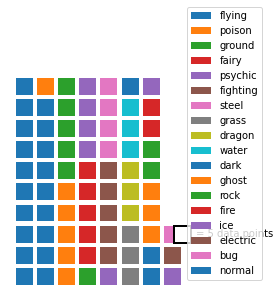

In [ ]:
# each box represents five full counts
waffle_counts = (pokemon['type_2'].value_counts() / 5).astype(int)

prev_count = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
    # and put a block at each index's location
    x = blocks % 10
    y = blocks // 10
    plt.bar(y, 0.8, 0.8, x)
    prev_count += waffle_counts[cat]

# box size legend
plt.bar(7.5, 0.8, 0.8, 2, color = 'white', edgecolor = 'black', lw = 2)
plt.text(8.1, 2.4,'= 5 data points', va = 'center')

# aesthetic wrangling
plt.legend(waffle_counts.index, bbox_to_anchor = (1, 0), loc = 8)
plt.axis('off')
plt.axis('square');

As a further extension, there's no restriction against us using icons for each tally, rather than just squares. Infographics often take this approach, by having each icon represent some number of units (e.g. one person icon representing one million people). But while it can be tempting to use icons to represent values as a bit of visual flair, an icon-based plot contains more chart junk than a bar chart that conveys the same information. There’s a larger cognitive challenge in having to count a number of icons to understand the scale of a value, compared to just referencing a box's endpoint on a labeled axis.

One other downside of the waffle plot is that it is not commonly supported out of the box for most visualization libraries, including Matplotlib and Seaborn. The length of the demonstration code presented above is a testament to that. The effort required to create a meaningful and useful waffle plot means that it is best employed carefully as a part of explanatory visualizations. During the exploratory phase, you're better off using more traditional plots like the bar chart to more rapidly build your understanding of the data. Check out more on [pywaffle](https://github.com/ligyxy/PyWaffle).